### Program 5

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt

# 1. Load dataset (IMDB movie reviews: positive/negative)
max_words = 10000 # top words to consider
max_len = 200 # max sequence length
# print("Loading data...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

# 2. Pad sequences (make all reviews same length)
# print("Paddings sequences...")
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# 3. Build model
# print("Building model...")
model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

# 4. Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# model.summary()

# 5. Train model
# print("Starting model training...")
history = model.fit(x_train, y_train,
                    epochs=3,
                    batch_size=64,
                    validation_split=0.2)
# print("Training complete.")

# 6. Evaluate model
# print("Evaluating model on test data...")
loss, acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 91s 281ms/step - accuracy: 0.7180 - loss: 0.5374 - val_accuracy: 0.8492 - val_loss: 0.3524
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 85s 272ms/step - accuracy: 0.9042 - loss: 0.2538 - val_accuracy: 0.8730 - val_loss: 0.3038
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 94s 300ms/step - accuracy: 0.9370 - loss: 0.1737 - val_accuracy: 0.8538 - val_loss: 0.3370
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.8510 - loss: 0.3479
Test Accuracy: 0.8537


Generating accuracy plot...


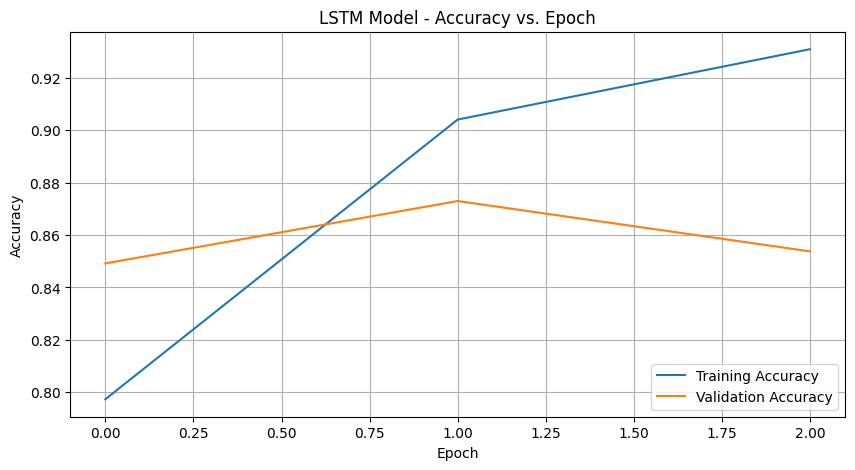

In [ ]:
print("Generating accuracy plot...")
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model - Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt

# 1. Load IMDB dataset (binary sentiment classification)
max_words = 10000 # only consider the top 10k words
max_len = 200 # cut & pad reviews to length 200
# print("Loading data...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

# 2. Pad sequences (make all reviews same length)
# print("Padding sequences...")
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# 3. Build RNN model
# print("Building model...")
model = Sequential([
    Embedding(input_dim=max_words, output_dim=64, input_length=max_len),
    SimpleRNN(64), # RNN layer
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# 4. Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# model.summary()

# 5. Train the model
# print("Starting model training...")
history = model.fit(x_train, y_train,
                    epochs=3,
                    batch_size=64,
                    validation_split=0.2)
# print("Training complete.")

# 6. Evaluate the model
# print("Evaluating model on test data...")
loss, acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 77ms/step - accuracy: 0.5953 - loss: 0.6436 - val_accuracy: 0.8186 - val_loss: 0.4208
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.8568 - loss: 0.3408 - val_accuracy: 0.8144 - val_loss: 0.4330
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 79ms/step - accuracy: 0.9056 - loss: 0.2434 - val_accuracy: 0.7518 - val_loss: 0.5267
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7477 - loss: 0.5312
Test Accuracy: 0.7529


Generating accuracy plot...


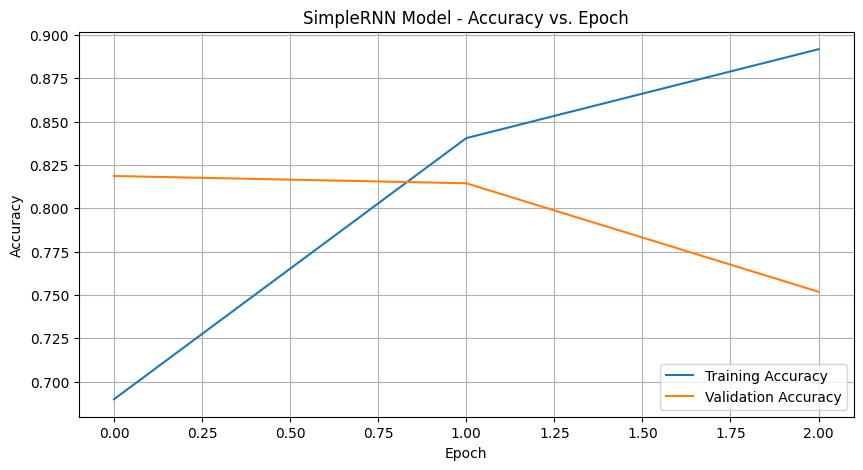

In [ ]:
import matplotlib.pyplot as plt

print("Generating accuracy plot...")
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('SimpleRNN Model - Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Program 6

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.4499
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0703
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0023
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.3257e-04
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.8565e-04
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.4318e-04
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.9385e-04
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.5282e-04
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.1428e-04
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.9509e-05
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


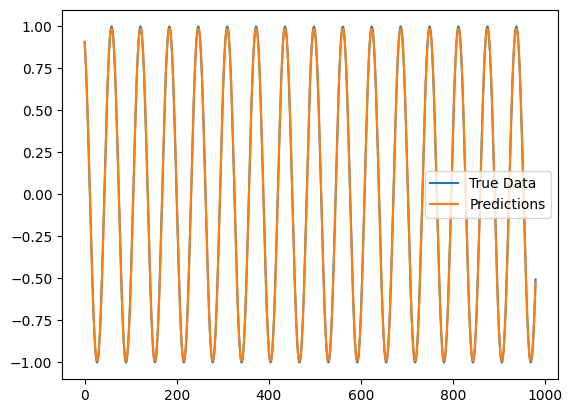

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

time = np.linspace(0, 100, 1000)
data = np.sin(time)

def create_dataset(data, seq_length=20):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 20
X, y = create_dataset(data, seq_length)

X = X.reshape((X.shape[0], X.shape[1], 1))

model = Sequential([
    LSTM(50, input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

model.fit(X, y, epochs=10, verbose=1)

pred = model.predict(X)

plt.plot(data[seq_length:], label='True Data')
plt.plot(pred, label='Predictions')
plt.legend()
plt.show()

/tmp/ipython-input-4130687625.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2020-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - loss: 0.0675
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0054
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0020
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - loss: 0.0013
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 9.6979e-04
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 9.7348e-04
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 8.2803e-04
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 9.1304e-04
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 7.5691e-04
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 8.5744e-04
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 7.3853e-04
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 6.1635e-04
Epoch 13/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 5.2512e-04
Epoch 14/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 5.0176e-04
Epoch 15/20
15/15 ━━━━━━━━━━━━

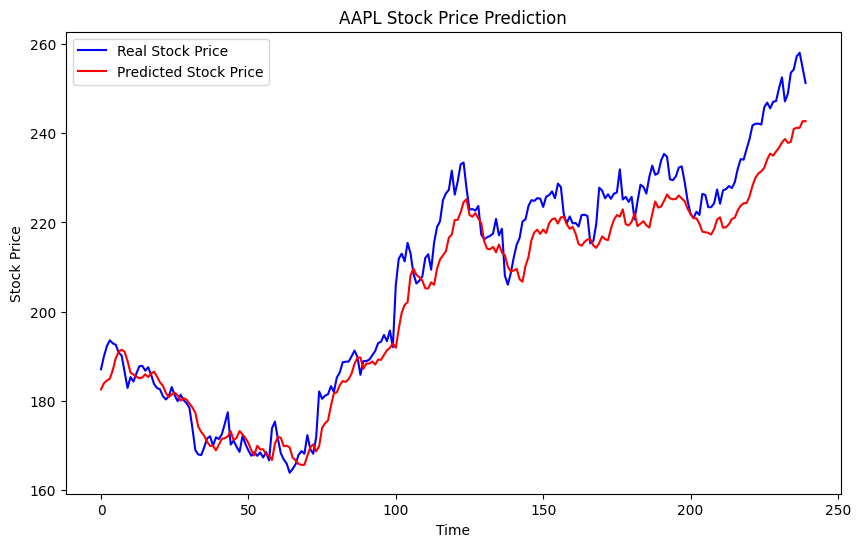

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2025-01-01')
data = data['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)
X = X.reshape(X.shape[0], X.shape[1], 1)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20, batch_size=64)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Real Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Program 7

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import numpy as np

# 1. Load Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 2. One-hot encode labels (This is small, fine to do in memory)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 3. Define constants
BATCH_SIZE = 32
TARGET_SIZE = (224, 224)
AUTOTUNE = tf.data.AUTOTUNE # Lets tf find the best parallel settings

# 4. Create a preprocessing function
# This function will be applied on-the-fly to each batch
def preprocess_image(image, label):
    image = tf.image.resize(image, TARGET_SIZE)
    image = preprocess_input(image) # Apply ResNet-50 specific normalization
    return image, label

# 5. Create tf.data.Dataset pipelines
# Training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.map(preprocess_image, num_parallel_calls=AUTOTUNE)
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(BATCH_SIZE).prefetch(AUTOTUNE)

# Validation (test) dataset
# No shuffling needed for validation
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.map(preprocess_image, num_parallel_calls=AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(AUTOTUNE)

# 6. Build the Model (No changes here)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# 7. Compile the Model (No changes here)
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 8. Train the Model (Using the .dataset objects)
# We pass the dataset objects directly to model.fit
# No need for x, y, batch_size, or validation_data arguments
history = model.fit(train_dataset,
                    validation_data=test_dataset,
                    epochs=5)

# 9. Evaluate the Model (Using the .dataset object)
test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

# 10. Save the Model
model.save('resnet50_cifar10_classifier.h5')
print("\nModel saved as 'resnet50_cifar10_classifier.h5'")

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 194s 114ms/step - accuracy: 0.6733 - loss: 1.0159 - val_accuracy: 0.8829 - val_loss: 0.3494
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 174s 110ms/step - accuracy: 0.8701 - loss: 0.3815 - val_accuracy: 0.8983 - val_loss: 0.3008
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 173s 109ms/step - accuracy: 0.8920 - loss: 0.3180 - val_accuracy: 0.9007 - val_loss: 0.2880
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 188s 119ms/step - accuracy: 0.9041 - loss: 0.2809 - val_accuracy: 0.9057 - val_loss: 0.2772
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 189s 111ms/step - accuracy: 0.9115 - loss: 0.2560 - val_accuracy: 0.9107 - val_loss: 0.2653
313/313 - 26s - 84ms/step - accuracy: 0.9107 - loss: 0.2653



Test Accuracy: 91.07%

Model saved as 'resnet50_cifar10_classifier.h5'


### Program 8

In [ ]:
import random

class GridWorld:
    def __init__(self, width, height, start, goal, obstacles=[]):
        self.width = width
        self.height = height
        self.start = start
        self.goal = goal
        self.obstacles = obstacles
        self.reset()

    def reset(self):
        self.agent_pos = self.start
        return self.agent_pos

    def render(self):
        for i in range(self.height):
            row = ''
            for j in range(self.width):
                if (i, j) == self.agent_pos:
                    row += 'A '
                elif (i, j) == self.start:
                    row += 'S '
                elif (i, j) == self.goal:
                    row += 'G '
                elif (i, j) in self.obstacles:
                    row += 'O '
                else:
                    row += '. '
            print(row)
        print()

    def step(self, action):
        x, y = self.agent_pos
        if action == 'up':
            x -= 1
        elif action == 'down':
            x += 1
        elif action == 'left':
            y -= 1
        elif action == 'right':
            y += 1
        else:
            print("Invalid action! Use: up, down, left, right")

        if 0 <= x < self.height and 0 <= y < self.width:
            new_pos = (x, y)
        else:
            new_pos = self.agent_pos

        self.agent_pos = new_pos

        if new_pos == self.goal:
            reward = 1
            done = True
        elif new_pos in self.obstacles:
            reward = -1
            done = True
        else:
            reward = -0.01
            done = False

        return new_pos, reward, done

width, height = 5, 5
start = (0, 0)
goal = (4, 4)

all_positions = [(i, j) for i in range(height) for j in range(width)]
all_positions.remove(start)
all_positions.remove(goal)
obstacles = random.sample(all_positions, 3)

env = GridWorld(width, height, start, goal, obstacles)
state = env.reset()
done = False

print("Welcome to Grid World!\n")
print("Game Rules:")
print(" - Reach the Goal (G) to win 🎉")
print(" - Avoid Obstacles (O), or you lose 💀")
print(" - You are the Agent (A), starting from Start (S)")
# This is the corrected line:
print(" - Use commands: up, down, left, right to move\n")

env.render()

while not done:
    action = input("Enter your move (up, down, left, right): ")
    state, reward, done = env.step(action)
    print(f"New State: {state}, Reward: {reward}")
    env.render()

if state == goal:
    print("🎉 Congratulations! You reached the goal!")
else:
    print("💀 Game Over! You hit an obstacle.")

Welcome to Grid World!

Game Rules:
 - Reach the Goal (G) to win 🎉
 - Avoid Obstacles (O), or you lose 💀
 - You are the Agent (A), starting from Start (S)
 - Use commands: up, down, left, right to move

A . . . . 
O . . . O 
. O . . . 
. . . . . 
. . . . G 

Enter your move (up, down, left, right): down
New State: (1, 0), Reward: -1
S . . . . 
A . . . O 
. O . . . 
. . . . . 
. . . . G 

💀 Game Over! You hit an obstacle.
